In [1]:
import numpy as np
import pandas as pd

In [168]:
lse_historical_data = pd.read_csv('Datasets/lse_historical_data.csv')

/Users/kamilestankeviciute/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [169]:
lse_historical_data

,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s
0,2017,11,OPM,2006-08-02,1PM PLC,Financial Services,Financials,United Kingdom,40.036935,NaN,NaN,NaN
1,2017,11,SPA,2009-02-02,1SPATIAL PLC,Industrial Goods & Services,Industrials,United Kingdom,29.467662,NaN,NaN,NaN
2,2017,11,C21,2005-04-15,21ST CENTURY TECHNOLOGY PLC,Industrial Goods & Services,Industrials,United Kingdom,2.564093,NaN,NaN,NaN
3,2017,11,III,1994-07-18,3I GROUP PLC,Financial Services,Financials,United Kingdom,8765.510388,NaN,NaN,NaN
4,2017,11,3IN,2007-03-13,3I INFRASTRUCTURE PLC,Financial Services,Financials,Jersey,2025.382649,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159395,2013,6,ZOX,2001-12-10,ZINCOX RESOURCES PLC,Mining,General Mining,United Kingdom,19.141342,NaN,NaN,NaN
159396,2013,6,ZOL,2004-05-18,ZOLTAV RESOURCES INC,General Financial,Specialty Finance,Cayman Islands,28.190878,NaN,NaN,NaN
159397,2013,6,ZOO,2001-05-14,ZOO DIGITAL GROUP PLC,Software & Computer Services,Software,United Kingdom,2.250767,NaN,NaN,NaN
159398,2013,6,ZTF,1995-02-28,ZOTEFOAMS,Chemicals,Specialty Chemicals,United Kingdom,81.457315,NaN,NaN,NaN


In [170]:
lse_historical_data['year'].value_counts()

2014    25362
2013    24940
2016    24197
2018    24125
2017    23790
2015    22934
2019    14052
Name: year, dtype: int64

In [171]:
lse_historical_data.replace({'month': {'Feb': '2'}}, inplace=True)
lse_historical_data

,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s
0,2017,11,OPM,2006-08-02,1PM PLC,Financial Services,Financials,United Kingdom,40.036935,NaN,NaN,NaN
1,2017,11,SPA,2009-02-02,1SPATIAL PLC,Industrial Goods & Services,Industrials,United Kingdom,29.467662,NaN,NaN,NaN
2,2017,11,C21,2005-04-15,21ST CENTURY TECHNOLOGY PLC,Industrial Goods & Services,Industrials,United Kingdom,2.564093,NaN,NaN,NaN
3,2017,11,III,1994-07-18,3I GROUP PLC,Financial Services,Financials,United Kingdom,8765.510388,NaN,NaN,NaN
4,2017,11,3IN,2007-03-13,3I INFRASTRUCTURE PLC,Financial Services,Financials,Jersey,2025.382649,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159395,2013,6,ZOX,2001-12-10,ZINCOX RESOURCES PLC,Mining,General Mining,United Kingdom,19.141342,NaN,NaN,NaN
159396,2013,6,ZOL,2004-05-18,ZOLTAV RESOURCES INC,General Financial,Specialty Finance,Cayman Islands,28.190878,NaN,NaN,NaN
159397,2013,6,ZOO,2001-05-14,ZOO DIGITAL GROUP PLC,Software & Computer Services,Software,United Kingdom,2.250767,NaN,NaN,NaN
159398,2013,6,ZTF,1995-02-28,ZOTEFOAMS,Chemicals,Specialty Chemicals,United Kingdom,81.457315,NaN,NaN,NaN


In [172]:
lse_historical_data['icb_industry'].value_counts()

Equity Investment Instruments             18455
Financial Services                        16038
Industrial Goods & Services                7733
Mining                                     7515
Support Services                           7510
                                          ...  
Debentures & Loans                           49
Food; Beverage and Tobacco                   49
Construction and Materials                   43
Personal Care; Drug and Grocery Stores       21
Automobiles and Parts                         9
Name: icb_industry, Length: 68, dtype: int64

In [173]:
lse_historical_data['icb_supersector'].value_counts()

Financials                       20936
Equity Investment Instruments    18455
Industrials                       9166
Consumer Services                 6563
Basic Materials                   5553
                                 ...  
Railroads                           49
Forestry                            47
Brewers                             45
Mortgage Finance                    25
Real Estate Investment Trusts       19
Name: icb_supersector, Length: 127, dtype: int64

In [174]:
finance_sector = lse_historical_data['icb_industry'].str.lower().str.contains('financ')
finance_sector

0          True
1         False
2         False
3          True
4          True
          ...  
159395    False
159396     True
159397    False
159398    False
159399    False
Name: icb_industry, Length: 159400, dtype: object

In [175]:
finance_sector_df = lse_historical_data[finance_sector == True]
finance_sector_df = finance_sector_df[finance_sector_df['country_of_incorporation'] == 'United Kingdom']
finance_sector_df['eps'].fillna(finance_sector_df['eps'].median(), inplace=True)
finance_sector_df['p/e'].fillna(finance_sector_df['p/e'].median(), inplace=True)
finance_sector_df['p/s'].fillna(finance_sector_df['p/s'].median(), inplace=True)
finance_sector_df

,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s
0,2017,11,OPM,2006-08-02,1PM PLC,Financial Services,Financials,United Kingdom,40.036935,0.1,8.582823,0.257812
3,2017,11,III,1994-07-18,3I GROUP PLC,Financial Services,Financials,United Kingdom,8765.510388,0.1,8.582823,0.257812
16,2017,11,AAS,1995-10-19,ABERDEEN ASIAN SMALLER COMPANIES INVESTMENT TR...,Financial Services,Financials,United Kingdom,354.465275,0.1,8.582823,0.257812
17,2017,11,ADIG,1952-03-24,ABERDEEN DIVERSIFIED INCOME AND GROWTH TRUST PLC,Financial Services,Financials,United Kingdom,387.691012,0.1,8.582823,0.257812
20,2017,11,AJIT,1998-10-01,ABERDEEN JAPAN INVESTMENT TRUST PLC,Financial Services,Financials,United Kingdom,93.528324,0.1,8.582823,0.257812
...,...,...,...,...,...,...,...,...,...,...,...,...
159321,2013,6,VLE,2002-12-24,VOLVERE,General Financial,Specialty Finance,United Kingdom,13.851792,0.1,8.582823,0.257812
159325,2013,6,WHI,2000-07-27,W.H.IRELAND GROUP,General Financial,Investment Services,United Kingdom,12.682072,0.1,8.582823,0.257812
159327,2013,6,WCW,1996-08-22,WALKER CRIPS GROUP PLC,General Financial,Investment Services,United Kingdom,11.495156,0.1,8.582823,0.257812
159348,2013,6,WST,1999-12-08,WESTSIDE INVESTMENTS PLC,General Financial,Specialty Finance,United Kingdom,2.500850,0.1,8.582823,0.257812


In [176]:
finance_sector_df_by_year = finance_sector_df.groupby('year').sum()
finance_sector_df_by_year

,market_cap,eps,p/e,p/s
year,,,,
2013,6.330405e+05,130.60,11209.167432,336.703125
2014,7.485027e+05,127.02,10561.892903,441.800626
2015,9.007274e+05,116.38,10120.954145,337.939930
2016,8.680164e+05,123.66,10572.870208,379.298887
2017,1.999370e+06,757.88,36621.828736,1489.358579
2018,2.297962e+06,658.06,35126.270603,1490.108375
2019,1.377860e+06,490.03,22991.580027,956.099441


In [177]:
finance_sector_condensed = finance_sector_df[['year', 'month', 'icb_industry', 'market_cap', 'eps', 'p/e', 'p/s']]
finance_sector_2016_2018 = finance_sector_condensed[(finance_sector_df['year'] >= 2016) & (finance_sector_df['year'] <= 2018)]
finance_sector_2016_2018

,year,month,icb_industry,market_cap,eps,p/e,p/s
0,2017,11,Financial Services,40.036935,0.10,8.582823,0.257812
3,2017,11,Financial Services,8765.510388,0.10,8.582823,0.257812
16,2017,11,Financial Services,354.465275,0.10,8.582823,0.257812
17,2017,11,Financial Services,387.691012,0.10,8.582823,0.257812
20,2017,11,Financial Services,93.528324,0.10,8.582823,0.257812
...,...,...,...,...,...,...,...
153194,2018,9,Financial Services,197.640000,0.10,8.582823,0.257812
153198,2018,9,Financial Services,708.740000,0.10,8.582823,0.257812
153201,2018,9,Financial Services,1467.130000,0.10,8.582823,0.257812
153214,2018,9,Financial Services,341.470000,0.10,8.582823,0.257812


In [210]:
finance_sector_2016_2018_by_month = finance_sector_2016_2018.groupby(['year', 'month']).sum().reset_index()
finance_sector_2016_2018_by_month[['year', 'month']] = finance_sector_2016_2018_by_month[['year', 'month']].astype('int64')
finance_sector_2016_2018_by_month = finance_sector_2016_2018_by_month.sort_values(['year', 'month'])
finance_sector_2016_2018_by_month

,year,month,market_cap,eps,p/e,p/s
0,2016,1,69058.864418,11.54,878.925732,29.721713
9,2016,2,69910.427381,10.30,884.030816,26.554688
10,2016,3,73199.132892,9.77,856.015559,36.671907
1,2016,4,72319.786213,9.97,879.643786,26.259458
2,2016,5,73676.181750,9.61,906.902703,30.478442
3,2016,6,67823.391762,11.40,926.187042,34.409323
4,2016,7,73163.086741,11.61,912.478377,26.719926
5,2016,8,75744.083136,10.40,892.613639,26.812500
11,2016,9,75780.637184,10.33,892.186914,28.706963
7,2016,10,72699.280980,9.74,851.147548,26.325129


In [211]:
%matplotlib inline
from matplotlib import pyplot

In [216]:
finance_sector_2016_2018_by_month_market_cap = finance_sector_2016_2018_by_month[['year', 'month', 'market_cap']]
finance_sector_2016_2018_by_month_market_cap['date'] = pd.to_datetime(finance_sector_2016_2018_by_month_market_cap[['year', 'month']].assign(Day=1))
finance_sector_2016_2018_by_month_market_cap.drop(['year', 'month'], inplace=True, axis=1)

/Users/kamilestankeviciute/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


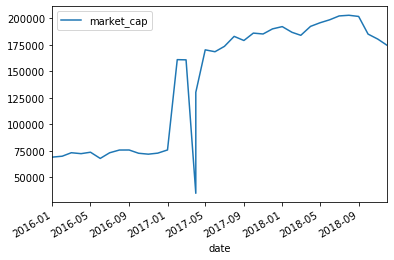

In [217]:
finance_sector_2016_2018_by_month_market_cap.plot(x='date', y='market_cap')